<h3> Exploring Support Vector Regression </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset about Concrete Slump test
data = pd.read_csv('./Datasets/cement_slump.csv')

In [2]:
print(data.sample(10))
print(data.info())

    Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  \
75   149.0  109.0    139.0  193.0   6.0         892.0       780.0      23.50   
50   320.0    0.0    163.0  188.0   9.0         866.0       776.0      23.50   
23   146.0  178.0      0.0  192.0  11.0         961.0       749.0      18.00   
64   265.0   86.0    111.0  195.0   6.0         833.0       790.0      27.00   
82   160.2    0.3    240.0  233.5   9.2         781.0       841.1      24.00   
95   184.3  153.4    239.2  179.0   7.5         920.2       640.9       0.00   
2    162.0  148.0    191.0  179.0  16.0         840.0       743.0       1.00   
83   140.2   30.5    239.0  169.4   5.3        1028.4       742.7      21.25   
30   321.0    0.0    164.0  190.0   5.0         870.0       774.0      24.00   
78   140.0    1.4    198.1  174.9   4.4        1049.9       780.5      16.25   

    FLOW(cm)  Compressive Strength (28-day)(Mpa)  
75      58.5                               28.70  
50      60.0     

- Exploring Correlations

In [3]:
data.corr()['Compressive Strength (28-day)(Mpa)'].sort_values()

Slag                                 -0.331522
Water                                -0.254320
SLUMP(cm)                            -0.223499
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
FLOW(cm)                             -0.124189
SP                                   -0.037909
Fly ash                               0.444380
Cement                                0.445656
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

<Axes: >

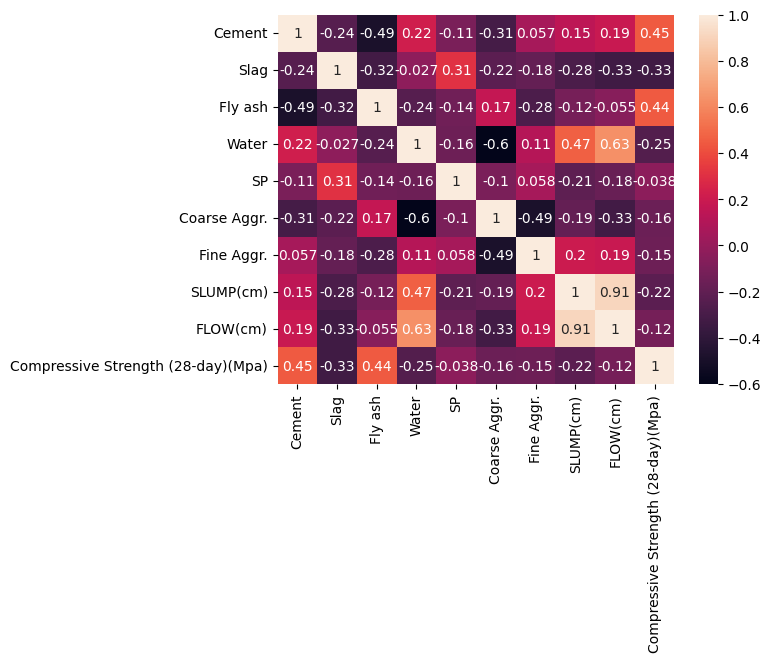

In [4]:
sns.heatmap(data=data.corr() , annot=True)

In [5]:
X = data.drop('Compressive Strength (28-day)(Mpa)' , axis=1)
y = data['Compressive Strength (28-day)(Mpa)']

- Model Making

In [6]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipe = Pipeline(steps=[ ('scaler' , StandardScaler()) , ('model' , SVR())])
params_grid = {
    'model__kernel':['linear' , 'rbf'],
    'model__gamma':[0.001 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5], # how much influence of a datapoint
    'model__C':[0.1 , 0.2 , 0.3 , 0.4 , 0.5], # Regularization Strength
    'model__epsilon':[0.1 , 0.2 , 0.3 , 0.4 , 0.5], # how much error is allowed
}

GridSearch_SVR = GridSearchCV(estimator=pipe , param_grid=params_grid , scoring='neg_root_mean_squared_error')
GridSearch_SVR.fit(X_train , y_train)

print(GridSearch_SVR.best_params_)
GridSearch_SVR.

{'model__C': 0.5, 'model__epsilon': 0.4, 'model__gamma': 0.001, 'model__kernel': 'linear'}


- Testing and Evaluation

In [7]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

y_pred = GridSearch_SVR.predict(X_test)
print(mean_absolute_error(y_test , y_pred))
print(np.sqrt(mean_squared_error(y_test , y_pred)))

2.2026986227738417
2.81149658845758
